In [1]:
import numpy as np
import pandas as pd
import os
import geopy as gp
import pylab as pl

In [2]:
datestring1 = '201501'

In [3]:
#download the file of specified link into pwd
os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring1 + "-citibike-tripdata.zip")
#move file to PUIdata
os.system("mv " + datestring1 + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))

#unzip zip file... AND move to PUIData
os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring1 + "-citibike-tripdata.zip" 
          + " -d " + os.getenv("PUIDATA"))

0

In [4]:
datestring2 = '201507'

In [5]:
#download the zip file of specified datestring into pwd
os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring2 + "-citibike-tripdata.zip")
#move zip file to PUIdata
os.system("mv " + datestring2 + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))

#unzip zip file... AND move to PUIData
os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring2 + "-citibike-tripdata.zip" 
          + " -d " + os.getenv("PUIDATA"))

0

In [6]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')

In [7]:
df1.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1


In [8]:
df2.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1


In [9]:
frames = [df1,df2]
dftotal = pd.concat(frames)
dftotalb = pd.concat(frames)

In [10]:
dftotal.tail(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1085673,273,7/31/2015 23:59:42,8/1/2015 00:04:15,383,Greenwich Ave & Charles St,40.735238,-74.000271,404,9 Ave & W 14 St,40.740583,-74.005509,22134,Customer,NaN,0
1085674,1273,7/31/2015 23:59:56,8/1/2015 00:21:09,477,W 41 St & 8 Ave,40.756405,-73.990026,432,E 7 St & Avenue A,40.726218,-73.983799,22861,Subscriber,1986.0,1
1085675,1667,7/31/2015 23:59:59,8/1/2015 00:27:46,2021,W 45 St & 8 Ave,40.759291,-73.988597,401,Allen St & Rivington St,40.720196,-73.989978,16458,Subscriber,1988.0,1


In [11]:
dftotal.drop(['stoptime', 'start station id', 'start station name',
              'start station latitude', 'start station longitude', 'end station id',
              'end station name', 'end station latitude', 'end station longitude', 'bikeid',
              'usertype', 'start station id', 'gender','birth year'], axis=1, inplace=True)

In [12]:
dftotal.head()

,tripduration,starttime
0,1346,1/1/2015 0:01
1,363,1/1/2015 0:02
2,346,1/1/2015 0:04
3,182,1/1/2015 0:04
4,969,1/1/2015 0:05


In [13]:
dftotal['date'] = pd.to_datetime(dftotal['starttime'])

In [14]:
dftotal.head()

,tripduration,starttime,date
0,1346,1/1/2015 0:01,2015-01-01 00:01:00
1,363,1/1/2015 0:02,2015-01-01 00:02:00
2,346,1/1/2015 0:04,2015-01-01 00:04:00
3,182,1/1/2015 0:04,2015-01-01 00:04:00
4,969,1/1/2015 0:05,2015-01-01 00:05:00


## Idea: Trip duration is different between day and night 
### H0: The two samples, day and night, come from the same parent distribution
### $$ \alpha = 0.05 $$

In [15]:
dftotal['hour'] = dftotal['date'].dt.hour

In [16]:
dftotal.tail()

,tripduration,starttime,date,hour
1085671,275,7/31/2015 23:59:40,2015-07-31 23:59:40,23
1085672,530,7/31/2015 23:59:41,2015-07-31 23:59:41,23
1085673,273,7/31/2015 23:59:42,2015-07-31 23:59:42,23
1085674,1273,7/31/2015 23:59:56,2015-07-31 23:59:56,23
1085675,1667,7/31/2015 23:59:59,2015-07-31 23:59:59,23


In [17]:
dftotal['daytime'] = np.where((dftotal['hour'] > 5) & (dftotal['hour']<18),'day','night' )

In [18]:
dftotal.tail()

,tripduration,starttime,date,hour,daytime
1085671,275,7/31/2015 23:59:40,2015-07-31 23:59:40,23,night
1085672,530,7/31/2015 23:59:41,2015-07-31 23:59:41,23,night
1085673,273,7/31/2015 23:59:42,2015-07-31 23:59:42,23,night
1085674,1273,7/31/2015 23:59:56,2015-07-31 23:59:56,23,night
1085675,1667,7/31/2015 23:59:59,2015-07-31 23:59:59,23,night


In [19]:
avgDaytime = dftotal.groupby('daytime', as_index=False).tripduration.mean()
avgDaytime

,daytime,tripduration
0,day,890.179242
1,night,928.009858


In [20]:
dfday = dftotal[dftotal.daytime == 'day']
dfnight = dftotal[dftotal.daytime == 'night']

In [21]:
dayduration = dfday['tripduration']
nightduration = dfnight['tripduration']

In [22]:
import scipy.stats
ks = scipy.stats.ks_2samp(dfday['tripduration'], dfnight['tripduration'])

In [23]:
print ks

Ks_2sampResult(statistic=0.022754872040973356, pvalue=1.8980926024220832e-135)


#### Note: This experiment consideres as daytime the hours between 6:00 and 17:59, the remaining period is nighttime

#### Remember: Our Null Hypothesis is that they ARE from the same distrubution. 

### The statistic value here 0.02275 is small and using the KS this tell us that the samples do come from the same parent distribution. Becuase that condition is met it doesnt matter the p value is much lower than our significance level of 0.05 and we cannot reject our Null Hypothesis


# Reduce data frame 

In [24]:
#Now for a reduced dataframe
dfdayreduced = dfday.sample(frac = 0.005 , random_state = 50)
dfnightreduced = dfnight.sample(frac = 0.005 , random_state = 50)


In [25]:
len (dfday)

927633

In [26]:
len (dfdayreduced)

4638

In [27]:
len (dfnight)

443595

In [28]:
len (dfnightreduced)

2218

In [29]:
ks = scipy.stats.ks_2samp(dfdayreduced['tripduration'], dfnightreduced['tripduration'])

In [30]:
print ks

Ks_2sampResult(statistic=0.031098803120496767, pvalue=0.10777356071184849)


### Similar to the above the statistic is small, however in this case the pvalue is higher than our 0.05 so we cannot reject the Null Hypothesis

#### Interesting fact, here we could see that for a smaller subset the KS test is not as reliable, as we tried moving the seed and the resultes were significantly different.



# Pearson's and Spearman test for correlation

$H_0$: There is no significant corellation between the duration of Citibike trips and the start time of the trips.

$ \alpha = 0.05 $

In [31]:
np.random.seed(50)

daydata = np.random.choice(dfday['tripduration'], size = 100000, replace = False)
nightdata = np.random.choice(dfnight['tripduration'], size = 100000, replace = False)

daysorted = np.sort(daydata)
nightsorted = np.sort(nightdata)

In [32]:
type (daydata)

numpy.ndarray

In [33]:
scipy.stats.pearsonr(daysorted, nightsorted )

(0.92949255273329656, 0.0)

### Pearsons: We observe a 0.9294 coefficient which tells us there is a very strong correlation between trip lenghts. p value to 0 also supports this. We can reject the Null Hypothesis

In [34]:
scipy.stats.spearmanr(daysorted, nightsorted)

SpearmanrResult(correlation=0.99999933599874335, pvalue=0.0)

### Spearman: We observe a very high 0.999999 coefficient which tells us there is a VERY strong correlation between trip lenghts. p value to 0 also supports this. We can reject the Null Hypothesis

# Borough of origin vs Age

To determine the borough I discovered that geopy has a function to get the county and the original idea was to create a different column on the dataframe with it. but working in the team the approach chosen was to have a set of coordinates and test against those. With more time I would have explored more the geopy approach. And also research more on how efficient (or not) it is.

## Preparing the data:

In [35]:
import geopy.geocoders as gp

#from geopy.geocoders import Nominatim
geolocator = gp.Nominatim()

In [36]:
my_dict = {}
my_dict = geolocator.reverse('40.683125, -73.978951').raw
my_dict

{u'address': {u'address29': u'Citi Bike - Dean St & 4 Ave',
  u'city': u'NYC',
  u'country': u'United States of America',
  u'country_code': u'us',
  u'county': u'Kings County',
  u'neighbourhood': u'Park Slope',
  u'postcode': u'11213',
  u'road': u'Dean Street',
  u'state': u'New York',
  u'suburb': u'BK'},
 u'boundingbox': [u'40.6830249',
  u'40.6832249',
  u'-73.9790514',
  u'-73.9788514'],
 u'display_name': u'Citi Bike - Dean St & 4 Ave, Dean Street, Park Slope, BK, Kings County, NYC, New York, 11213, United States of America',
 u'lat': u'40.6831249',
 u'licence': u'Data \xa9 OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright',
 u'lon': u'-73.9789514',
 u'osm_id': u'3708656313',
 u'osm_type': u'node',
 u'place_id': u'49311114'}

In [37]:
county = my_dict['address']['county']
print county

Kings County


In [38]:
dfAge = dftotalb

In [39]:
dfAge['age'] = 2015 - dfAge['birth year']
dfAge['age'].dropna(inplace= True)
dfAge.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,55.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,52.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,41.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,46.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,38.0


In [40]:
dfAge.drop(['tripduration', 'starttime', 'stoptime', 'end station id', 'end station name',
      'end station latitude', 'end station longitude', 'bikeid', 'gender'
       ], axis=1, inplace=True)

In [41]:
dfAge.head()

,start station id,start station name,start station latitude,start station longitude,usertype,birth year,age
0,455,1 Ave & E 44 St,40.750020,-73.969053,Subscriber,1960.0,55.0
1,434,9 Ave & W 18 St,40.743174,-74.003664,Subscriber,1963.0,52.0
2,491,E 24 St & Park Ave S,40.740964,-73.986022,Subscriber,1974.0,41.0
3,384,Fulton St & Waverly Ave,40.683178,-73.965964,Subscriber,1969.0,46.0
4,474,5 Ave & E 29 St,40.745168,-73.986831,Subscriber,1977.0,38.0


In [42]:
dfAge['borough'] = ""

In [43]:
#Determining Boroughs 

#Anything greater than 40.739246 is Manhattan
dfAge.loc[dfAge['start station latitude'] > 40.739246, 'borough'] = 'Manhattan'

#Anything less than 40.700420 is Brooklyn
dfAge.loc[dfAge['start station latitude'] < 40.700420, 'borough'] = 'Brooklyn'

#Anything less than 40.738868 and greater than -73.971104 is Brooklyn
dfAge.loc[(dfAge['start station latitude'] < 40.738868) & (dfAge['start station longitude'] > -73.971104), 'borough'] = 'Brooklyn'

#Anything greater than 40.710150 and less than  -73.971778 is Manhattan
dfAge.loc[(dfAge['start station latitude'] > 40.710150) & (dfAge['start station longitude'] < -73.971778), 'borough'] = 'Manhattan'

#Anything greater than 40.700040 and less than -74.000767 is Manhattan
dfAge.loc[(dfAge['start station latitude'] > 40.700040) & (dfAge['start station longitude'] < -74.000767), 'borough'] = 'Manhattan'

#Anything less than 40.707762 and greater than -73.998355 is Brooklyn
dfAge.loc[(dfAge['start station latitude'] < 40.707762) & (dfAge['start station longitude'] > -73.998355), 'borough'] = 'Brooklyn'

dfAge.head()
#dfBor = dfAge
#type(dfBor)

,start station id,start station name,start station latitude,start station longitude,usertype,birth year,age,borough
0,455,1 Ave & E 44 St,40.750020,-73.969053,Subscriber,1960.0,55.0,Manhattan
1,434,9 Ave & W 18 St,40.743174,-74.003664,Subscriber,1963.0,52.0,Manhattan
2,491,E 24 St & Park Ave S,40.740964,-73.986022,Subscriber,1974.0,41.0,Manhattan
3,384,Fulton St & Waverly Ave,40.683178,-73.965964,Subscriber,1969.0,46.0,Brooklyn
4,474,5 Ave & E 29 St,40.745168,-73.986831,Subscriber,1977.0,38.0,Manhattan


In [44]:
df_M = dfAge[dfAge.borough == 'Manhattan']
df_B = dfAge[dfAge.borough == 'Brooklyn']

df_M['age'] = 2015 - df_M['birth year']
df_B['age'] = 2015 - df_B['birth year']

Clean_M = df_M.dropna()
Clean_B = df_B.dropna()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## KS testing, with full and reduced samples.
$H_0$: The two samples come from a common distribution

$ \alpha = 0.05 $

### KS

In [45]:
Man = Clean_M['age'].values
Brook = Clean_B['age'].values

scipy.stats.ks_2samp(Man, Brook)

Ks_2sampResult(statistic=0.10770895578010363, pvalue=0.0)

### We can see a 0.1077 statistics that indicates the maximun distance between the two samples (Manhattan and Brooklyn) this value being small tells us it is likely they come from the same parent distribution.  The condition is met, regardless of pvalue. We cannot reject Null Hypothesis (both samples being from same distribution type)

## KS - reduced dataset 

In [46]:
small_sample_M = (len(Clean_M))/200
small_sample_B = (len(Clean_B))/200

dfSmall_M = Clean_M.sample(small_sample_M, random_state=50)
dfSmall_B = Clean_B.sample(small_sample_B, random_state=50)

M_val_small = dfSmall_M['age'].values
B_val_small = dfSmall_B['age'].values

scipy.stats.ks_2samp(M_val_small, B_val_small)

Ks_2sampResult(statistic=0.08936797251341927, pvalue=0.007379942546689792)

###  We can see a 0.08936 statistics that indicates the maximun distance between the two samples,  this value being small tells us it is likely they come from the same parent distribution.  The condition is met, regardless of pvalue being extremely small. We cannot reject Null Hypothesis. 

# Pearson's and Spearman test for correlation

$H_0$: There is no statistical significant corellation between the borough of origin and age of Citibike riders
$ \alpha = 0.05 $


In [47]:
np.random.seed(70)
Cor_M = np.random.choice(Clean_M['age'], size=20000)
Cor_B = np.random.choice(Clean_B['age'], size=20000)
Sort_M = np.sort(Cor_M)
Sort_B = np.sort(Cor_B)

In [48]:
scipy.stats.pearsonr(Sort_M, Sort_B)

(0.99205409440602543, 0.0)

### Pearsons: We can see an extremely high statistics and a 0 pvalue. This indicates we can reject the Null Hypothesis

In [49]:
scipy.stats.spearmanr(Sort_M, Sort_B)

SpearmanrResult(correlation=0.99899147775638864, pvalue=0.0)

### Spearman: Likewise, ee can see an extremely high statistics and a 0 pvalue. This indicates we can reject the Null Hypothesis

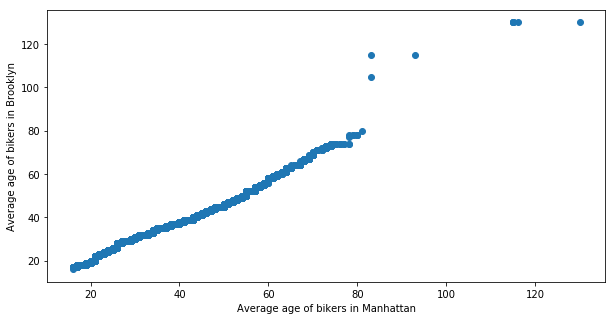

In [50]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.scatter(Sort_M, Sort_B)

ax.set_xlabel("Average age of bikers in Manhattan")
ax.set_ylabel("Average age of bikers in Brooklyn")


pl.show()



Figure: above we can simply see the correlation in a graphical manner